<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{1}$
<ol> 
    <li> <u><b> Regression </b></u>: you can use multiple variables to get a good numerical prediction of the power needed </li>
    <li> <u><b> Regression </b></u>: the variables that are given are perfect for doing regression to estimate the home prices </li>
    <li> <u><b> Classification </b></u>: you want to choose between two categories </li>
    <li> <u><b> Regression </b></u>: you can use many variables to estimate how many buyers you will actually have </li>
    <li> <u><b> (Multi-)Classificiation </b></u>: instead of choosing between two options, you choose between three </li>
    <li> <u><b> Rule Mining or Conditional Probability Estimation </b></u>: i) rule mining since you can group together items that people frequently purchase together and ii) cond. prob. estimation since you can figure out the likelihood they would buy a new item given the items that you know they liked </li>
    <li> <u><b> Clustering </b></u>: grouping together people to divide consumers into clusters </li>
    <li> <u><b> Rule Mining </b></u>: finding patterns to associate items that are bought together </li>
    <li> <u><b> Density Estimation </b></u>: if we find the density we can estimate moments and variance </li>
    <li> <u><b> Conditional Probability Estimation </b></u>: updating our guess with new information </li>
    <li> <u><b> (Logistic) Regression or Conditional Probability </b></u> Estimation: i) regression to convert other variables such as the indices into a guess whether the stock will increase or decrease in price (binary decision, so logistic) and ii) conditioning on previous performances, volatility, volume and other stocks/indices, you can guess how Amazon will perform </li>
    <li> <u><b> Ranking </b></u>: rank the machines to know which ones to fix first </li>
    <li> <u><b> Rule Mining </b></u>: finding associations between various genes in the body </li>
</ol>

<hr style="height:2px;border-width:0;color:gray;background-color:black">

NOTE: all functions used to calculate these outputs are at the bottom. I did use these functions and not a calculator and this can be verified within this notebook if desired. I just removed the print statements and testing that I used purely for ease of readability. Thanks!

In [1]:
# packages used

# pandas only for presenting data
import pandas as pd

# numpy only for partition, because i didn't want to sort
import numpy as np

# pyplot for plotting
import matplotlib.pyplot as plt

# need exp and log2
import math

# load in data (only 10 points, so done by hand; would have used CSV and pandas for this)
ages = [20,18,15,16,17,21,23,15,17,17]
courses = [1,1,0,0,1,1,1,1,0,1]
likestats = [0,1,1,0,1,0,0,1,1,0]
y = [0,0,1,1,0,0,1,0,1,0]
gs = [0] * len(ages)
fs = [0] * len(ages)

# load in known theta parameters
theta = [0.05,-3,2.5]
theta0 = 0.3

# function for g(x)
def g(x):
    return theta[0]*x[0] + theta[1]*x[1] + theta[2]*x[2] + theta0

# list for g(x)
gs = [g((ages[i],courses[i],likestats[i])) for i in range(len(ages))]

# function for f(x)
def f(x):
    return 1/(1 + math.exp(-1*x))

# list for f(x)
fs = [f(gs[i]) for i in range(len(gs))]

# present table of values
d2 = {
    "ages": ages,
    "course": courses,
    "likeStats": likestats,
    "Y": y,
    "g(x)": gs,
    "f(x)": fs
}

df2 = pd.DataFrame(data=d2)
df2

,ages,course,likeStats,Y,g(x),f(x)
0,20,1,0,0,-1.70,0.154465
1,18,1,1,0,0.70,0.668188
2,15,0,1,1,3.55,0.972077
3,16,0,0,1,1.10,0.750260
4,17,1,1,0,0.65,0.657010
5,21,1,0,0,-1.65,0.161109
6,23,1,0,1,-1.55,0.175086
7,15,1,1,0,0.55,0.634136
8,17,0,1,1,3.65,0.974667
9,17,1,0,0,-1.85,0.135873


In [2]:
# helper function used for finding which threshold has the lowest misclassification error
def best_threshold(guesses, reals):
    threshold = round(min(guesses) - 0.01, 2)
    k = 0
    best = threshold
    best_misses = len(guesses) + 1
    misses = 0
    while threshold <= max(guesses)+0.1:
        
        # loop through list of guesses
        for i in range(len(guesses)):
            # count if guess is larger than threshold
            s = 1 if guesses[i] >= threshold else 0
            
            # count false positives or false negatives
            misses = misses+1 if s != reals[i] else misses
        
        # replace the threshold and best misses if this threshold is better
        if misses < best_misses:
            best_misses = misses
            best = threshold
        
        # reset misses
        misses = 0
        
        # partition array and choose next value as threshold
        k += 1
        if (k == len(guesses)-1):
            threshold = max(guesses)+0.1
        elif (k == len(guesses)):
            break
        else:
            threshold = (np.partition(np.asarray(guesses), k)[k] + np.partition(np.asarray(guesses), k+1)[k+1])/2
        
    return best


# tester function, not for use
# 
def best_threshold_d(guesses, reals):
    threshold = round(min(guesses) - 0.01, 2)
    k = 0
    d = {}
    fp = 0
    fn = 0
    while threshold <= max(guesses)+0.1:
        
        # loop through list of guesses
        for i in range(len(guesses)):
            # count if guess is larger than threshold
            s = 1 if guesses[i] >= threshold else 0
            
            # count false positives or false negatives
            fp = fp+1 if (s==1 and reals[i]==0) else fp
            fn = fn+1 if (s==0 and reals[i]==1) else fn
        
        # add thresholds and corresponding misses to dictionary
        d[threshold] = fp+fn
        
        # reset misses
        fp = 0
        fn = 0
        
        # partition array and choose next value as threshold
        k += 1
        if (k == len(guesses)-1):
            threshold = max(guesses)+0.1
        elif (k == len(guesses)):
            break
        else:
            threshold = (np.partition(np.asarray(guesses), k)[k] + np.partition(np.asarray(guesses), k+1)[k+1])/2
    
    return d


# returns dictionary that holds info on tps, tns, fps, and fns, for each threshold
def roc_dict(guesses, reals):
    threshold = round(min(guesses) - 0.01, 2)
    k = 0
    d = {}
    fp = 0
    fn = 0
    tp = 0
    tn = 0
    while threshold <= max(guesses)+0.1:
        
        # loop through list of guesses
        for i in range(len(guesses)):
            # count if guess is larger than threshold
            s = 1 if guesses[i] >= threshold else 0
            
            # count false positives or false negatives
            tp = tp+1 if (s==1 and reals[i]==1) else tp
            tn = tn+1 if (s==0 and reals[i]==0) else tn
            fp = fp+1 if (s==1 and reals[i]==0) else fp
            fn = fn+1 if (s==0 and reals[i]==1) else fn
        
        # add thresholds and corresponding misses to dictionary
        d[threshold] = {"true positive": tp, "true negative": tn, "false positive": fp, "false negative": fn}
        
        # reset misses
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        # partition array and choose next value as threshold
        k += 1
        if (k == len(guesses)-1):
            threshold = max(guesses)+0.1
        elif (k == len(guesses)):
            break
        else:
            threshold = (np.partition(np.asarray(guesses), k)[k] + np.partition(np.asarray(guesses), k+1)[k+1])/2

    return d

print(best_threshold(gs, y))
print(best_threshold(fs, y))

0.9
0.7092239388816419


<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{2(a)}$

One of the best thresholds to minimize misclassification error in $g(\mathbf{x})$ is $0.9$ (anything in $(0.7, 1.1]$ will be fine). This results in $1$ misclassification.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{2(b)}$

One of the best thresholds to minimize misclassification error in $f(\mathbf{x})$ is $0.7$ (anything in $(0.66819, 0.7502]$ will be fine). This results in $1$ misclassification.

$\underline{\textbf{Confusion matrix for $\mathbf{f(x)}$}}$

$$\begin{array} {|r|r|}\hline & y = 1 & y = 0 \\ \hline \hat{y} = 1 & 3 & 0 \\ \hline \hat{y} = 0 & 1 & 6 \\ \hline  \end{array}$$

$\underline{\textbf{Precision for $\mathbf{f(x)}$}}$

$$ \dfrac{\text{TP}}{\text{TP} + \text{FP}} = \dfrac{3}{3 + 0} = 1.$$

$\underline{\textbf{Recall for $\mathbf{f(x)}$}}$

$$ \dfrac{\text{TP}}{\text{TP} + \text{FN}} = \dfrac{3}{3 + 1} = \dfrac{3}{4}.$$

$\underline{\textbf{F1 Score for $\mathbf{f(x)}$}}$

$$ \text{F1} = 2 \cdot \dfrac{\text{Precision}\cdot\text{Recall}}{\text{Precision} + \text{Recall}} = 2\cdot\dfrac{(1)(0.75)}{(1) + (0.75)} = \dfrac{1.5}{1.75}= \dfrac{6}{7}.$$

In [3]:
# fpr calculated the fpr given a dictionary
def fpr(dic):
    return dic["false positive"]/(dic["false positive"] + dic["true negative"])

# tpr calculated the tpr given a dictionary
def tpr(dic):
    return dic["true positive"]/(dic["true positive"] + dic["false negative"])

# calculate up fprs and tprs for each threshold
fprs = []
tprs = []
d1 = roc_dict(fs,y)

for key in d1:
    fprs.append(fpr(d1[key]))
    tprs.append(tpr(d1[key]))

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{2(c)}$

Text(0.5, 1.0, 'ROC for f(x) (with 45-degree line for reference)')

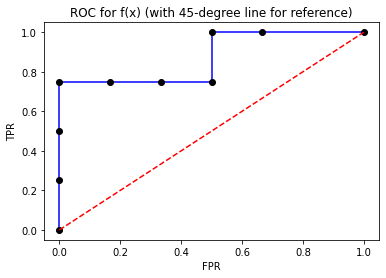

In [4]:
# plot ROC with points

plt.plot(fprs, tprs, 'b-')
plt.plot(fprs, tprs, 'o', color='black')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for f(x) (with 45-degree line for reference)")

In [5]:
# calculate AUC as riemann sum, with trapezoid when needed
def auc(xs, ys):
    s = 0
    for i in range(1, len(xs)):
        # they are ordered in decreasing order, so xs[i-1] >= xs[i]
        
        if xs[i] != xs[i-1] and ys[i] != ys[i-1]:
            # diagonal changes in roc, need triangle
            s = s+ (xs[i-1] - xs[i])*(ys[i] + ys[i-1])/2
        else:
            # vertical changes in roc, need rectangle
            s = s+ (xs[i-1] - xs[i])*(ys[i])
    return s22

$\underline{\textbf{AUC}}$

$$ \text{AUC} = \frac{7}{8} = 0.875.$$

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{2(d)}$

Interestingly, the best threshold of $f(\mathbf{x})$ is the same as the threshold of $g(\mathbf{x})$ (i.e., between the same two points, in order).

Similarly, any function $h: \mathbb{R} \to \mathbb{R}$ that is a monotonically increasing transformation of any function $f: \mathbb{R} \to \mathbb{R}$ will have the same ROC (and thus the same AUC) as $f$.

For any function $h: \mathbb{R} \to \mathbb{R}$ that is a monotonically decreasing transformation of any function $f: \mathbb{R} \to \mathbb{R}$ will have an inverted ROC (and thus 1 - AUC) of $f$.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{3}$

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{3.1}$

We know that
$$ Gain(X,X) = H(X) - H(X|X) $$

By definition,
$$ \begin{align*}
H(X|X) &= -\sum_{i=1}^{n} \left[\sum_{j = 1}^{n} \mathbb{P}(X = x_j | X = x_i) \log(\mathbb{P}(X = x_j | X = x_i)) \right] \mathbb{P}(X = x_i).
\end{align*}$$

But
$$ \mathbb{P}(X = x_j | X = x_i) = \begin{cases} 1 & i = j \\ 0 & i \neq j \end{cases} $$

That means, whenever $i \neq j$, 
$$ \mathbb{P}(X = x_j | X = x_i) \log(\mathbb{P}(X = x_j | X = x_i)) = 0 $$
and whenver $i = j$,
$$ \mathbb{P}(X = x_j | X = x_i) \log(\mathbb{P}(X = x_j | X = x_i)) = \log(1) = 0. $$

Thus we get $H(X | X) = 0$ so
$$ Gain(X, X) = H(X).$$

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{3.2}$

For the separate events, we get
$$ \begin{align*}
Gain_1 = Gain(X,E_1) &= H(X) - H(X | E_1) \\
Gain_2 = Gain((X | E_1), E_2) &= H(X | E_1) - H((X | E_1)| E_2).
\end{align*}$$

Note,
$$\begin{align*}
H((X|E_1)|E_2) &= H(X|E_1, E_2)
\end{align*}$$
since
$$\mathbb{P}(X|E_1) = \frac{\mathbb{P}(X, E_1)}{\mathbb{P}(E_1)}$$
so conditioning on both sides, we get
$$ \begin{align*}
\mathbb{P}((X|E_1)|E_2) &= \frac{\mathbb{P}(X, E_1 | E_2))}{\mathbb{P}(E_1 | E_2)} \\
&= \frac{\frac{\mathbb{P}(X, E_1, E_2)}{\mathbb{P}(E_2)}}{\mathbb{P}(E_1)} \\
&= \frac{\mathbb{P}(X, E_1, E_2)}{\mathbb{P}(E_1, E_2)} \\
&= \mathbb{P}(X | E_1, E_2).
\end{align*}$$

Since this conditional probability is the same, the conditional entropy will be similar as it is based on this calculation.

Thus, continuing inductively,
$$ \begin{align*}
Gain_1 = Gain(X,E_1) &= H(X) - H(X | E_1) \\
Gain_2 = Gain((X | E_1), E_2) &= H(X | E_1) - H(X | E_1, E_2) \\
Gain_3 = Gain((X | E_1, E_2), E_3) &= H(X | E_1, E_2) - H(X | E_1, E_2, E_3) \\
&\vdots\\ 
Gain_n = Gain((X | E_1,\dots,E_{n-1}), E_n) &= H(X | E_1, \dots, E_{n-1}) - H(X | E_1, \dots, E_{n}) \\
\end{align*}$$

Summing these, we get
$$ \sum_{i=1}^{n} Gain_i = H(X) - H(X | E_1, \dots, E_{n}) = I(X, (E_1, \dots, E_n)).$$

This is exactly what we wanted to show, since $E_1, \dots, E_n$ is all of the events happeining together.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{3.3}$

Suppose that we use the definition of entropy with $\ln$ for ease of using Taylor approximations. Let $A_i$ be the event $Y = y_i$ and let $B_j$ be the event that $X = x_j$ for each $i$ and $j$. Also let $a_i = \mathbb{P}(Y = y_i)$ and let $b_j = \mathbb{P}(X = x_j)$. Applying the law of total probability, we get
$$\begin{align*}
I(X, Y) &= H(Y) - H(Y | X) \\
        &= -\sum_{i=1}^{m} a_i\log(a_i) - \sum_{j = 1}^{n} H(Y | B_j)b_j \\
        &= -\sum_{i=1}^{m} \mathbb{P}(A_i)\ln(\mathbb{P}(A_i)) + \sum_{j = 1}^{n} \left[\sum_{i=1}^{m} \mathbb{P}(A_i | B_j) \log(\mathbb{P}(A_i | B_j))\right] \mathbb{P}(B_j) \\
        &= \sum_{j = 1}^{n} \sum_{i=1}^{m} \mathbb{P}(A_i, B_j) \ln(\mathbb{P}(A_i | B_j)) - \sum_{i=1}^{m} \left[\sum_{j=1}^{n} \mathbb{P}(A_i, B_j)\right]\log(\mathbb{P}(A_i)) \\
        &= \sum_{i=1}^{m}\sum_{j=1}^{n} \mathbb{P}(A_i, B_j)\log\left(\frac{\mathbb{P}(A_i, B_j)}{\mathbb{P}(A_i)\mathbb{P}(B_j)}\right).
\end{align*}$$

Define the following distributions: $\mathbb{P}(A_i, B_j) = p_{Y,X}(y_i, x_i)$, $\mathbb{P}(A_i) = p_{Y}(y_i)$, and $\mathbb{P}(B_j) = p_{X}(x_j)$. Then
$$\begin{align*}
I(X, Y) &= \sum_{i=1}^{m}\sum_{j=1}^{n} \mathbb{P}(A_i, B_j)\log\left(\frac{\mathbb{P}(A_i, B_j)}{\mathbb{P}(A_i)\mathbb{P}(B_j)}\right) \\
        &= \sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j) \log\left(\frac{p_{Y,X}(y_i, x_j)}{p_Y(y_i) p_X(x_j)}\right).
\end{align*}$$

We know that $\sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j) = 1$ by the sume of total probability (all probabilities add up to $1$). So, by Jensen's inequaltiy with the convexity of $-\log$, we get
$$\begin{align*}
I(X, Y) &= \sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j) \log\left(\frac{p_{Y,X}(y_i, x_j)}{p_Y(y_i) p_X(x_j)}\right) \\ \\
        &= -\frac{\sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j) \log\left(\frac{p_Y(y_i) p_X(x_j)}{p_{Y,X}(y_i, x_j)}\right)}{\sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j)} \\ \\
        &\geq -\log \, \left(\frac{\sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j) \left(\frac{p_Y(y_i) p_X(x_j)}{p_{Y,X}(y_i, x_j)}\right)}{\sum_{i=1}^{m}\sum_{j=1}^{n} p_{Y,X}(y_i, x_j)}\right) \\
        &= -\log \, \left(\sum_{i=1}^{m}\sum_{j=1}^{n} p_Y(y_i) p_X(x_j) \right) \\ \\
        &= -\log \, \left(\left[\sum_{i=1}^{m} p_Y(y_i)\right]\left[\sum_{j=1}^{n} p_X(x_j)\right] \right) \\ \\
        &= -\log(1) \\ \\
        &= 0.
\end{align*}$$

This shows that $I(X,Y) \geq 0$.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{3.4}$

$\textbf{(a)}$
Let $A_i$ be the event $X = x_i$ and let $B_j$ be the event $Y = y_j$ and let $C_{ij}$ be the event $X + Y = x_i + y_j$ for each $i$ and $j$. Note in particular that $\mathbb{P}(C_{ij}|A_i) = \mathbb{P}(X+Y = x_i + y_j | X = x_i) = \mathbb{P}(Y = y_j|X=x_j) = \mathbb{P}(B_j|A_i)$ by basic algebra. We get
$$\begin{align*}
H(Z|X) &= H(X+Y|X) \\
        &= \sum_{i=1}^{r} H(X+Y|A_i)\mathbb{P}(A_i) \\
        &= -\sum_{i=1}^{r}\left[\sum_{j=1}^{s} \mathbb{P}(C_{ij}|A_i) \log\left(\mathbb{P}(C_{ij}|A_i)\right)\right] \mathbb{P}(A_i) \\
        &= -\sum_{i=1}^{r}\left[\sum_{j=1}^{s} \mathbb{P}(B_{j}|A_i) \log\left(\mathbb{P}(B_{j}|A_i)\right)\right] \mathbb{P}(A_i) \\
        &= \sum_{i=1}^{r}H(Y|A_i) \mathbb{P}(A_i) \\
        &= H(Y|X).
\end{align*}$$

A similar arugment shows $H(Z|Y) = H(X|Y)$ (replacing the letters).
<br></br>

$\textbf{(b)}$
From 3.3, we know that $I(Z, X) = H(Z) - H(Z|X) \geq 0 \implies H(Z) \geq H(Z|X)$. Also, due to independence and the law of total probability,
$$ \begin{align*}
H(Y|X) &= \sum_{i=1}^{r} \left[\sum_{j=1}^{s} \mathbb{P}(B_j|A_i)\log(\mathbb{P}(B_j|A_i))\right]\mathbb{P}(A_i) \\
        &= \sum_{j=1}^{s}\sum_{i=1}^{r}\mathbb{P}(A_i,B_j)\log(\mathbb{P}(B_j)) \\
        &= \sum_{j=1}^{s} \mathbb{P}(B_j)\log(\mathbb{P}(B_j)) \\
        &= H(Y).
\end{align*}$$

Thus applying 3.3, the fact due to independence, and 3.4(a),
$$ \begin{align*}
H(Z) \geq H(Z|X) = H(Y|X) = H(Y).
\end{align*}$$

And a similar argument shows
$$ \begin{align*}
H(Z) \geq H(Z|Y) = H(X|Y) = H(X).
\end{align*}$$

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{4}$

In [6]:
# set up data sets
x1 = [1,1,1,0,0,0,1,0,0,0]
x2 = [0,1,0,1,0,0,1,1,1,0]
x3 = [0,0,1,1,0,1,1,0,1,1]
y = [0,0,0,1,0,1,0,1,1,1]

# count number of positives and negatives in initial reading
S = {"Positives":0, "Negatives":0}
for i in y:
    S["Positives"] = S["Positives"]+1 if i>0 else S["Positives"]
    S["Negatives"] = S["Negatives"]+1 if i<=0 else S["Negatives"]

print(S)

d4 = {
    "X1": x1,
    "X2": x2,
    "X3": x3,
    "Y": y
}

df4 = pd.DataFrame(data=d4)
df4

{'Positives': 5, 'Negatives': 5}


,X1,X2,X3,Y
0,1,0,0,0
1,1,1,0,0
2,1,0,1,0
3,0,1,1,1
4,0,0,0,0
5,0,0,1,1
6,1,1,1,0
7,0,1,0,1
8,0,1,1,1
9,0,0,1,1


In [7]:
# calculates gini index of node given proportion of positives
def gini(p):
    return 2*p*(1-p)

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{4.1}$

In [8]:
# loop through each variable, and each child
# two values so there should be two children, 1 and 0, each
counter = {}
def children_count(l):
    # initialize 0s for each child
    children = {}
    
    # initialize branch for all children
    for j in l:
        children[j] = 0 

    for j in children:
        pos = 0
        neg = 0
        for k in range(len(l)):
            if l[k] == j:
                pos = pos+1 if y[k]>0 else pos
                neg = neg+1 if y[k]<=0 else neg
        children[j] = {"Positives": pos, "Negatives": neg}
    
    return children

counter["X1"] = children_count(x1)
counter["X2"] = children_count(x2)
counter["X3"] = children_count(x3)


In [9]:
# loop through each variable, and each child
# two values so there should be two children, 1 and 0, each
counter = {}
def children_count(l):
    # initialize 0s for each child
    children = {}
    
    # initialize branch for all children
    for j in l:
        children[j] = 0 

    for j in children:
        pos = 0
        neg = 0
        for k in range(len(l)):
            if l[k] == j:
                pos = pos+1 if y[k]>0 else pos
                neg = neg+1 if y[k]<=0 else neg
        children[j] = {"Positives": pos, "Negatives": neg}
    
    return children

# load in each children positive and negative count 
counter["X1"] = children_count(x1)
counter["X2"] = children_count(x2)
counter["X3"] = children_count(x3)


# gini reduction given 
#     n: number of nodes in the current branch
#     p: probability in current branch
#     d: dictionary holding info on positives and negatives of child
def gini_reduction(s_dic, a_dic):
    s_pos = s_dic["Positives"]
    s_neg = s_dic["Negatives"]
    N = s_pos + s_neg
    
    old = gini(s_pos/N)
    new = 0
    for key in a_dic:
        a_pos = a_dic[key]["Positives"]
        a_neg = a_dic[key]["Negatives"]
        n = a_pos + a_neg
        
        # calculate gini index of child branch
        g = gini(a_pos/n)
        
        # calculate new average gini index, weighting by number of nodes
        new = new + (n/N)*g
    return old - new

print(gini_reduction(S,counter["X1"]))
print(gini_reduction(S,counter["X2"]))
print(gini_reduction(S,counter["X3"]))

0.33333333333333337
0.020000000000000018
0.08333333333333331


$\textbf{(a)}$

Since $X_1$ has the best reduction in Gini Index at $\approx 0.3333$, we split on $X_1$.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

In [10]:
# helper function calculates entropy
def entropy(ps):
    h = 0
    for i in ps:
        h = h + i*math.log2(i)
    return -1*h

# give old state and new state, as dictionaries
#     both dictionaries contain the positives and negatives
#     s_dic just contains positives and negatives
#     a_dic contains subdictionaries for each child branch
def information_gain(s_dic, a_dic):
    s_pos = s_dic["Positives"]
    s_neg = s_dic["Negatives"]
    N = s_pos + s_neg
    
    # entropy of original branch
    old = entropy([s_pos/N,s_neg/N])
    
    # calculate weighted sum of child branches
    new = 0
    for key in a_dic:
        a_pos = a_dic[key]["Positives"]
        a_neg = a_dic[key]["Negatives"]
        n = a_pos + a_neg
        
        if a_pos == 0:
            l = [a_neg/n]
        elif a_neg == 0:
            l = [a_pos/n]
        else:
            l = [a_pos/n,a_neg/n]
        
        new = new + (n/N)*entropy(l)
    
    return old - new

print(information_gain(S,counter["X1"]))
print(information_gain(S,counter["X2"]))
print(information_gain(S,counter["X3"]))

0.6099865470109875
0.02904940554533142
0.12451124978365313


$\textbf{(b)}$

Since $X_1$ has the information gain at $\approx 0.61$, we split on $X_1$.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{4.2}$

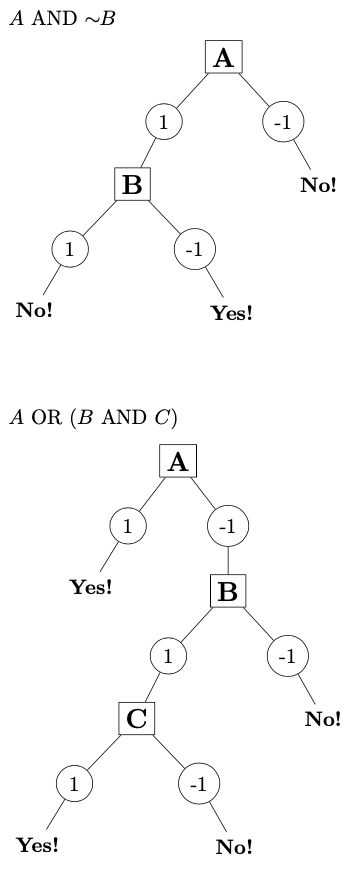

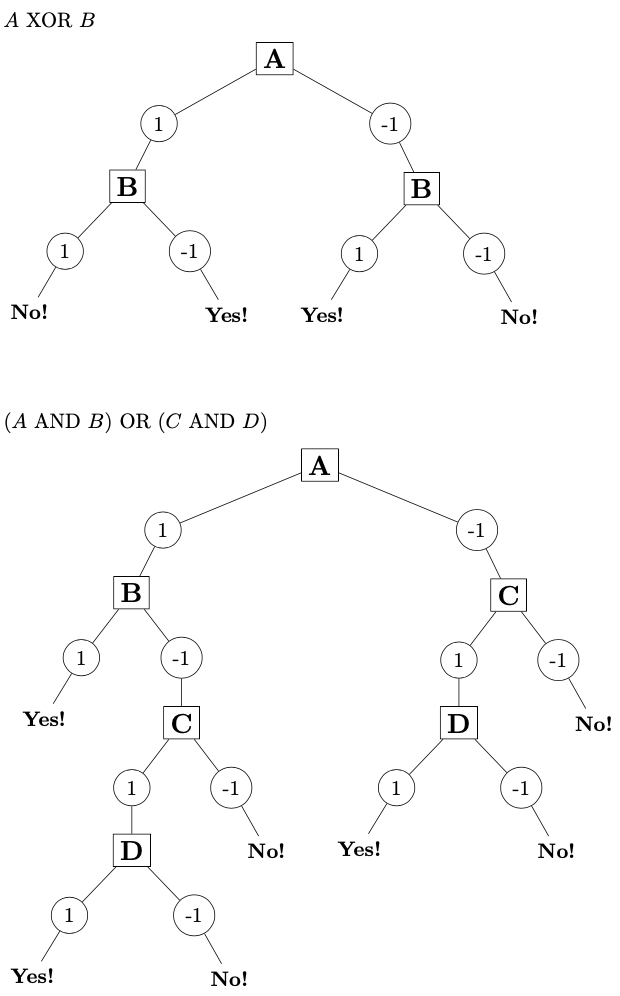

<hr style="height:2px;border-width:0;color:gray;background-color:black">

$\large \textbf{4.3}$

In [11]:
! pip install graphviz
! pip install dl8.5
! pip install chefboost

"""graphviz can be used to visualize the tree built"""
"""feel free to add other imports"""

from IPython.display import SVG

import pandas as pd
from chefboost import Chefboost as chef
from sklearn import tree, metrics, datasets
import graphviz
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
import statistics

import numpy as np

In [12]:
# load data
df = pd.read_csv("../../Datasets/Titanic.csv")
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [13]:
# inspect which values need to be dummied
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [14]:
# drop cabin values because of many missing values
df = df.drop('Cabin',1)

# make dummies for non_numeric
df = pd.get_dummies(df, drop_first=True)

In [15]:
"""Your code here"""
# drop nan objects
df = df.dropna()

# move survived to last column
df = df[[c for c in df if c not in ['Survived']] + ['Survived']]

# nice cleaned set
df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0,0
886,2,27.0,0,0,13.0000,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,1
889,1,26.0,0,0,30.0000,1,0,0,1


In [16]:
# choose features and target variable
x = df.iloc[:,:-1] # everything except survived
y = df.iloc[:,-1] # survived

In [17]:
# cross validate ccp_alpha and the splitting criteria
alphas = np.arange(0.0,1.0,0.01)
criteria = ['gini', 'entropy']

# average accuracies for each param
alpha_acc = {}
crit_acc = {}
for a in alphas:
    alpha_acc[a] = {'accs':[0]*10, 'mean':0, 'sd':0}
for c in criteria:
    crit_acc[c] = {'accs':[0]*10, 'mean':0,'sd':0}


# set aside test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=1)

# split training set
kf = KFold(n_splits = 10)

# counter for lists
iter = 0

# tune alpha first
for train_index, test_index in kf.split(x_train):
    # create training and validation set
    x_t, x_v = x_train.iloc[train_index,:], x_train.iloc[test_index,:]
    y_t, y_v = y_train.iloc[train_index], y_train.iloc[test_index]

    # loop through alphas
    for a in alphas:
        clf = tree.DecisionTreeClassifier(ccp_alpha = a)
        clf.fit(x_t, y_t)
        pred = clf.predict(x_v)

        # calculate accuracy of split
        acc = metrics.accuracy_score(pred, y_v)
    
        # add it to alpha column
    
        alpha_acc[a]['accs'][iter] = acc
    iter = iter+1

for a in alphas:
    li = alpha_acc[a]['accs']
    alpha_acc[a]['mean'] = statistics.mean(li)
    alpha_acc[a]['sd'] = statistics.stdev(li)

# means and sds
# print(alpha_acc)

best_a = -1
best_mean = -1
best_sd = -1
for a in alphas:
    if alpha_acc[a]['mean'] >= best_mean:
        best_a = a
        best_mean = alpha_acc[a]['mean']
        best_sd = alpha_acc[a]['sd']

# best gets
print(best_a)
print(best_mean)
print(best_sd)


0.01
0.8036538461538462
0.036631965379623904


The best mean accuracy we can get so far is $0.803$ with $\alpha = 0.01$ (sd = $0.0366$).

In [18]:
# reset counter
iter = 0

# tune criterion now with known alpha
for train_index, test_index in kf.split(x_train):
    # create training and validation set
    x_t, x_v = x_train.iloc[train_index,:], x_train.iloc[test_index,:]
    y_t, y_v = y_train.iloc[train_index], y_train.iloc[test_index]

    # loop through alphas
    for c in criteria:
        clf = tree.DecisionTreeClassifier(criterion = c, ccp_alpha = 0.01)
        clf.fit(x_t, y_t)
        pred = clf.predict(x_v)

        # calculate accuracy of split
        acc = metrics.accuracy_score(pred, y_v)

        # add it to crit column
        crit_acc[c]['accs'][iter] = acc
    iter = iter+1

for c in crit_acc:
    li = crit_acc[c]['accs']
    crit_acc[c]['mean'] = statistics.mean(li)
    crit_acc[c]['sd'] = statistics.stdev(li)

# means and sds
# print(crit_acc)

best_a = -1
best_mean = -1
best_sd = -1
for c in crit_acc:
    if crit_acc[c]['mean'] >= best_mean:
        best_a = c
        best_mean = crit_acc[c]['mean']
        best_sd = crit_acc[c]['sd']

print(best_a)
print(best_mean)
print(best_sd)

gini
0.8036538461538462
0.036631965379623904


The best accuracy we can get now is $0.803$ with $\alpha = 0.01$ and Gini criterion (sd = $0.0366$)

In [19]:
# now to run on the test set and see our accuracy
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(metrics.classification_report(pred, y_test))
print(metrics.accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.75      0.90      0.82        20

    accuracy                           0.89        72
   macro avg       0.85      0.89      0.87        72
weighted avg       0.90      0.89      0.89        72

0.8888888888888888


The predicted accuracy score is $0.9028$, with $\alpha = 0.01$ and Gini criterion.

<hr style="height:2px;border-width:0;color:gray;background-color:black">

In [20]:
# new tree
df1 = pd.read_csv('../../Datasets/Titanic.csv')

# simplify dataset here so that tree runs in reasonable time
# drop cabin because of many missing values
df1 = df1.drop("Cabin", 1)
df1 = pd.get_dummies(df1, drop_first = True)

# id3
config = {'algorithm': 'ID3'}

# set up decision as last column
d = df1.Survived.map({1:'Yes', 0:'No'})
df1 = df1.drop('Survived', 1)
df1['Decision'] = d

# clean nan
df1 = df1.dropna()

df1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Decision
0,3,22.0,1,0,7.2500,1,0,1,No
1,1,38.0,1,0,71.2833,0,0,0,Yes
2,3,26.0,0,0,7.9250,0,0,1,Yes
3,1,35.0,1,0,53.1000,0,0,1,Yes
4,3,35.0,0,0,8.0500,1,0,1,No
...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0,No
886,2,27.0,0,0,13.0000,1,0,1,No
887,1,19.0,0,0,30.0000,0,0,1,Yes
889,1,26.0,0,0,30.0000,1,0,0,Yes


In [21]:
pd.options.mode.chained_assignment = None
# set aside test set
train, test = train_test_split(df1, test_size=0.1)

# do folds on whole data set, since chefboost needs data still attached
kf = KFold(n_splits=10, shuffle = True, random_state = 1)

# range of depths
depths = range(2,10,1)

# depth accuracy
d_acc = {}
for d in depths:
    d_acc[d] = {'accs':[0]*10, 'mean':0, 'sd': 0}
    
#iterate to count list
iter = 0

# tune depth = 1 first
for train_index, test_index in kf.split(train):
    # create training and validation set
    t = train.iloc[train_index, :]
    v = train.iloc[test_index, :-1]
    
    v_true = train.iloc[test_index, -1]
    v_pred = []

    for de in depths:
        print('Depth: ' +str(de)+' \n \n')
        v_pred = []
        config1 = {'algorithm':'ID3','max_depth':de}
        model = chef.fit(t, config = config1)
        for row in v.values.tolist():
            v_pred.append(chef.predict(model, row))
        d_acc[de]['accs'][iter] = metrics.accuracy_score(v_true, v_pred)
    iter = iter+1

    print('\n -------------------------------------------------------------------------------- \n')
    
print(d_acc)

Depth: 2 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  7.445879697799683  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  84.40207972270363 % on  577  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[301, 53], [37, 186]]
Precision:  85.0282 %, Recall:  89.0533 %, F1:  86.9942 %
Depth: 3 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  5.723296880722046  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  84.40207972270363 % on  577  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[301, 53], [37, 186]]
Precision:  85.0282 %, Recall:  89.0533 %, F1:  86.9942 %
Depth: 4 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  6.661325693130493  seco

-------------------------
finished in  6.910828590393066  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  85.46712802768167 % on  578  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[317, 63], [21, 177]]
Precision:  83.4211 %, Recall:  93.787 %, F1:  88.3009 %
Depth: 7 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.827224731445312  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  85.46712802768167 % on  578  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[316, 62], [22, 178]]
Precision:  83.5979 %, Recall:  93.4911 %, F1:  88.2682 %
Depth: 8 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  10.588733911514282  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  85.46712802768167 

-------------------------
finished in  6.157094955444336  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.91003460207612 % on  578  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[321, 74], [19, 164]]
Precision:  81.2658 %, Recall:  94.4118 %, F1:  87.3469 %
Depth: 3 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  4.997830867767334  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.91003460207612 % on  578  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[316, 69], [24, 169]]
Precision:  82.0779 %, Recall:  92.9412 %, F1:  87.1724 %
Depth: 4 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  4.939034938812256  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.91003460207612 %

-------------------------
finished in  4.476470947265625  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.21799307958477 % on  578  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[321, 83], [14, 160]]
Precision:  79.4554 %, Recall:  95.8209 %, F1:  86.8741 %
Depth: 7 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  5.075811147689819  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.21799307958477 % on  578  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[313, 75], [22, 168]]
Precision:  80.6701 %, Recall:  93.4328 %, F1:  86.5837 %
Depth: 8 
 

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  5.315837144851685  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.21799307958477 %

In [22]:
for d in d_acc:
    li = d_acc[d]['accs']
    d_acc[d]['mean'] = statistics.mean(li)
    d_acc[d]['sd'] = statistics.stdev(li)

best_d = -1
best_mean = -1
best_sd = -1
for d in d_acc:
    if d_acc[d]['mean'] >= best_mean:
        best_d = d
        best_mean = d_acc[d]['mean']
        best_sd = d_acc[d]['sd']

print(best_d)
print(best_mean)
print(best_sd)

2
0.7693990384615385
0.04644258003892825


The mean accuracy score is $0.798$, with depth set to $2$.

In [23]:
# run the best model
config = {'algorithm':'ID3', 'max_depth':2}
best_model = chef.fit(train, config)

# create test data
x_test = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

y_pred = []

for row in x_test.values.tolist():
    y_pred.append(chef.predict(model, row))


print(metrics.classification_report(y_true, y_pred))
print(metrics.accuracy_score(pred, y_test))

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  6.5691750049591064  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  84.42367601246106 % on  642  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[335, 60], [40, 207]]
Precision:  84.8101 %, Recall:  89.3333 %, F1:  87.013 %
              precision    recall  f1-score   support

          No       0.88      0.88      0.88        49
         Yes       0.74      0.74      0.74        23

    accuracy                           0.83        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.83      0.83      0.83        72

0.8888888888888888
